In [36]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

#date	location	new_cases	new_deaths	total_cases	total_deaths
CVD = pd.read_csv('/content/full_data (1).csv')
print(CVD.head())
print(CVD.dtypes)

#dateFormat = '%Y-%m-%d'
# Convert string values of date to datetime format
CVD['date'] = CVD['date'].astype(str).replace('nan', 'NaT')

# Convert the non-missing values to datetime
CVD['date'] = [dt.datetime.strptime(x, '%d-%m-%Y') if x != 'NaT' else pd.NaT for x in CVD['date']]
print(CVD.dtypes)

#Check for missing data


         date     location  new_cases  new_deaths  total_cases  total_deaths
0  31-12-2019  Afghanistan        0.0         0.0          NaN           NaN
1  01-01-2020  Afghanistan        0.0         0.0          NaN           NaN
2  02-01-2020  Afghanistan        0.0         0.0          NaN           NaN
3  03-01-2020  Afghanistan        0.0         0.0          NaN           NaN
4  04-01-2020  Afghanistan        0.0         0.0          NaN           NaN
date             object
location         object
new_cases       float64
new_deaths      float64
total_cases     float64
total_deaths    float64
dtype: object
date            datetime64[ns]
location                object
new_cases              float64
new_deaths             float64
total_cases            float64
total_deaths           float64
dtype: object


In [37]:
print(CVD.isnull().sum())

date                0
location            0
new_cases         333
new_deaths        333
total_cases      3303
total_deaths    12940
dtype: int64


In [38]:
CVD.fillna(0, inplace=True)

# Print the DataFrame to verify that null values have been replaced with 0
print(CVD.isnull().sum())

date            0
location        0
new_cases       0
new_deaths      0
total_cases     0
total_deaths    0
dtype: int64


In [39]:
CVD.columns = ['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases', 'Total Deaths' ]

#Select all countries except for china and World
CVD_no_china = CVD.loc[~(CVD['Country'].isin(["China", "World"]))]

#Group them by location and date, select only total cases and deaths for closer observation
#Reset index because groupby by default makes grouped columns indices
CVD_no_china = pd.DataFrame(CVD_no_china.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()
print(CVD_no_china)

#Sort values by each country and by date - descending. Easy to interpret plots
CVD_no_china = CVD_no_china.sort_values(by = ['Country','Date'], ascending=False)
print(CVD_no_china)




           Country       Date  Total Cases  Total Deaths
0      Afghanistan 2019-12-31          0.0           0.0
1      Afghanistan 2020-01-01          0.0           0.0
2      Afghanistan 2020-01-02          0.0           0.0
3      Afghanistan 2020-01-03          0.0           0.0
4      Afghanistan 2020-01-04          0.0           0.0
...            ...        ...          ...           ...
58679     Zimbabwe 2020-11-25       9398.0         274.0
58680     Zimbabwe 2020-11-26       9508.0         274.0
58681     Zimbabwe 2020-11-27       9623.0         274.0
58682     Zimbabwe 2020-11-28       9714.0         275.0
58683     Zimbabwe 2020-11-29       9822.0         275.0

[58684 rows x 4 columns]
           Country       Date  Total Cases  Total Deaths
58683     Zimbabwe 2020-11-29       9822.0         275.0
58682     Zimbabwe 2020-11-28       9714.0         275.0
58681     Zimbabwe 2020-11-27       9623.0         274.0
58680     Zimbabwe 2020-11-26       9508.0         274.0
58679

<ipython-input-39-3266eafdd337>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CVD_no_china = pd.DataFrame(CVD_no_china.groupby(['Country', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()


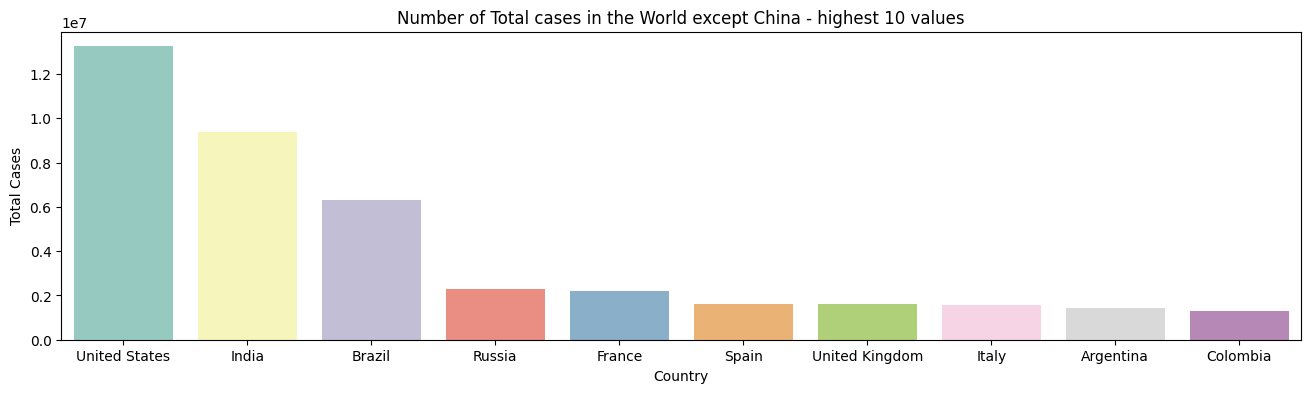

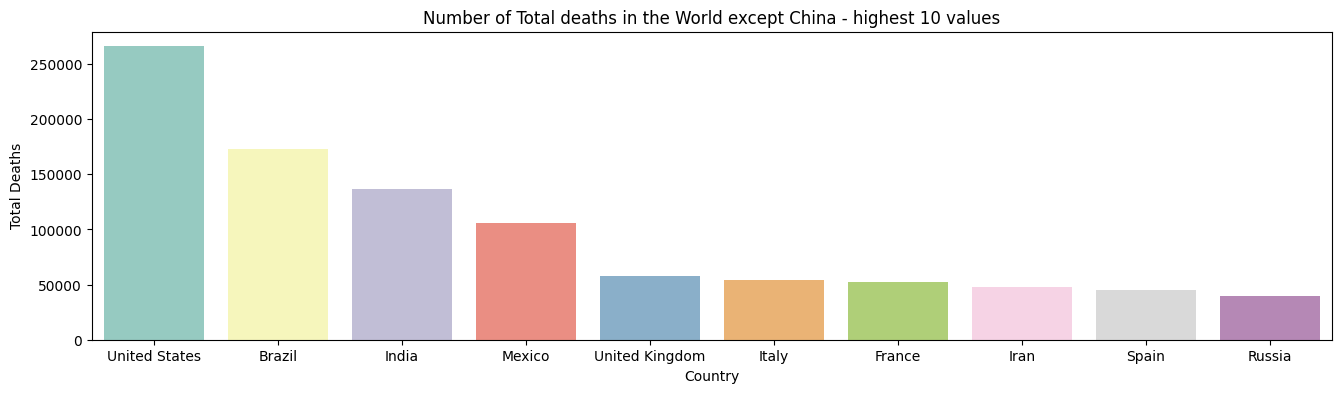

In [41]:
def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(x=df[feature][0:10],y= df[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

filtered_CVD_no_china = CVD_no_china.drop_duplicates(subset = ['Country'], keep='first')
plot_bar('Country', 'Total Cases', 'Total cases in the World except China', filtered_CVD_no_china, size=4)
plot_bar('Country', 'Total Deaths', 'Total deaths in the World except China', filtered_CVD_no_china, size=4)

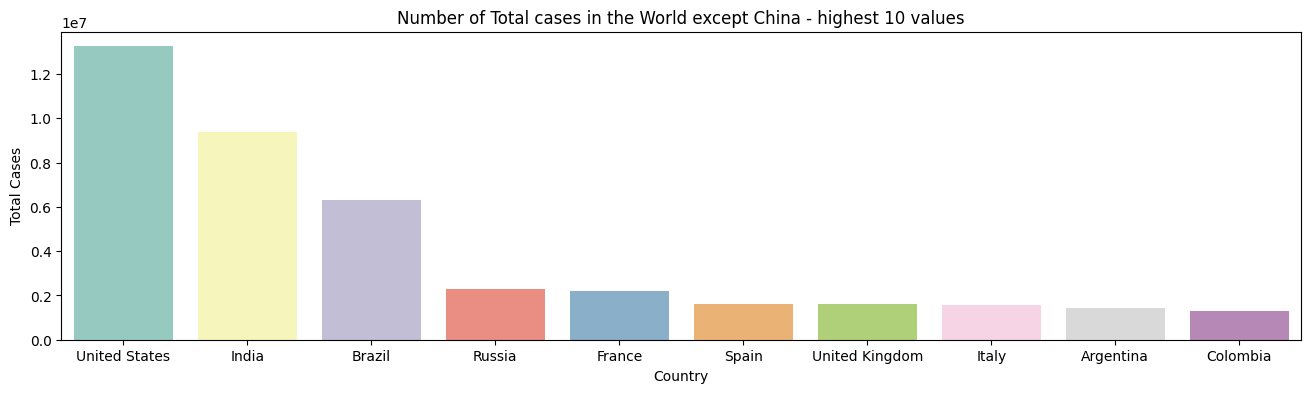

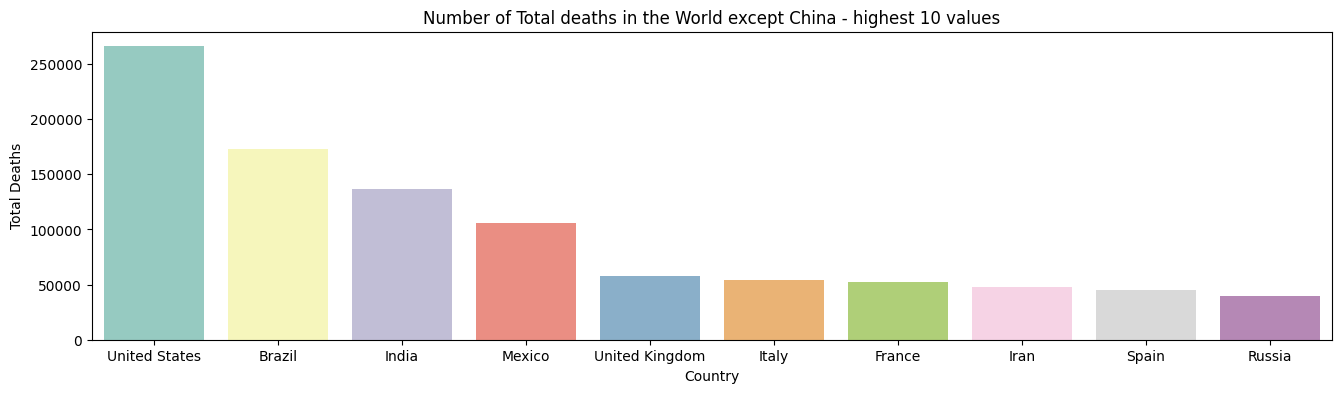

In [43]:
def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(x=df[feature][0:10],y= df[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
#    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

filtered_CVD_no_china = CVD_no_china.drop_duplicates(subset = ['Country'], keep='first')
plot_bar('Country', 'Total Cases', 'Total cases in the World except China', filtered_CVD_no_china, size=4)
plot_bar('Country', 'Total Deaths', 'Total deaths in the World except China', filtered_CVD_no_china, size=4)

<ipython-input-44-90cab65523d9>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CVD_no_china_aggregate = CVD_no_china.groupby(['Date']).sum().reset_index()


          Date  Total Cases  Total Deaths
0   2019-12-31          0.0           0.0
1   2020-01-01          0.0           0.0
2   2020-01-02          0.0           0.0
3   2020-01-03          0.0           0.0
4   2020-01-04          0.0           0.0
..         ...          ...           ...
330 2020-11-25   59810576.0     1406042.0
331 2020-11-26   60460221.0     1418625.0
332 2020-11-27   61010116.0     1429263.0
333 2020-11-28   60612242.0     1412281.0
334 2020-11-29   59732850.0     1380975.0

[335 rows x 3 columns]


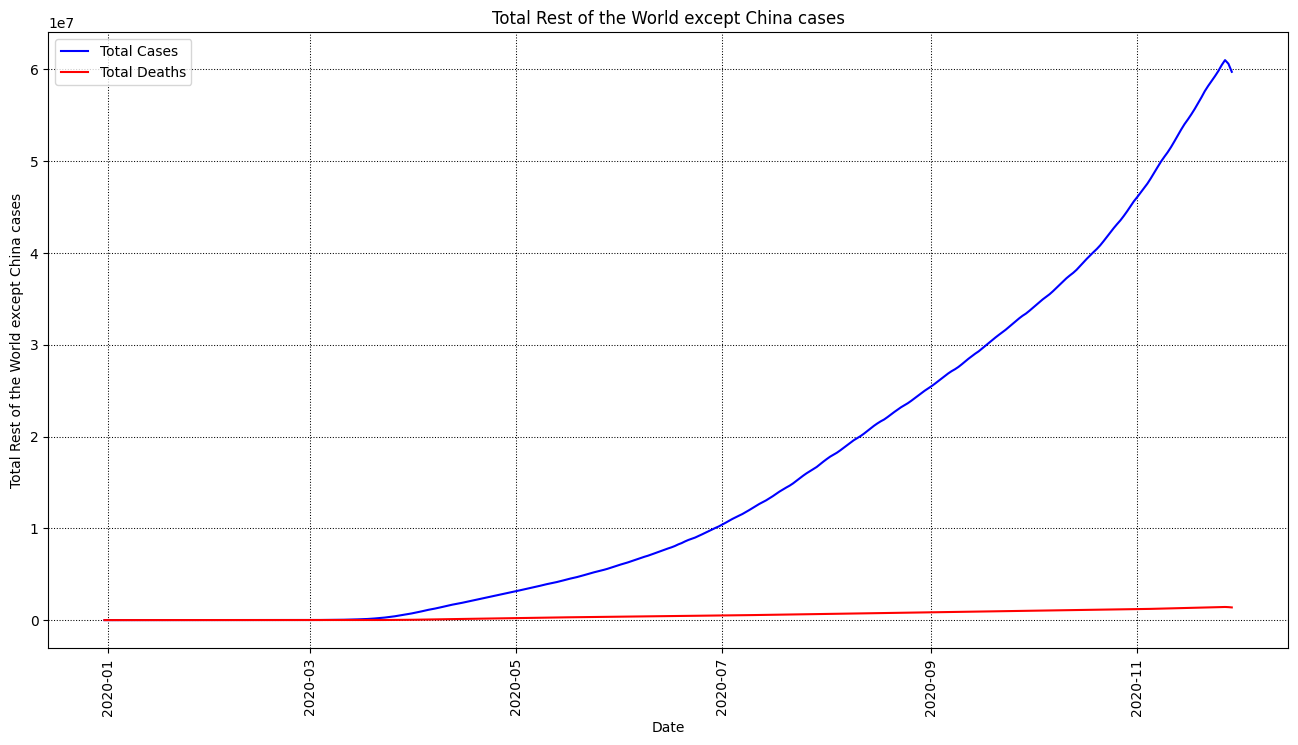

In [44]:
def plot_world_aggregate(df, title='Aggregate plot', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Total Cases', data=df, color='blue', label='Total Cases')
    g = sns.lineplot(x="Date", y='Total Deaths', data=df, color='red', label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel(f'Total {title} cases')
    plt.xticks(rotation=90)
    plt.title(f'Total {title} cases')
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

#Group by dates.
#Reset index because groupby by default makes grouped columns indices
#Sum values from all countries per given date
CVD_no_china_aggregate = CVD_no_china.groupby(['Date']).sum().reset_index()
print(CVD_no_china_aggregate)

plot_world_aggregate(CVD_no_china_aggregate, 'Rest of the World except China', size=4)

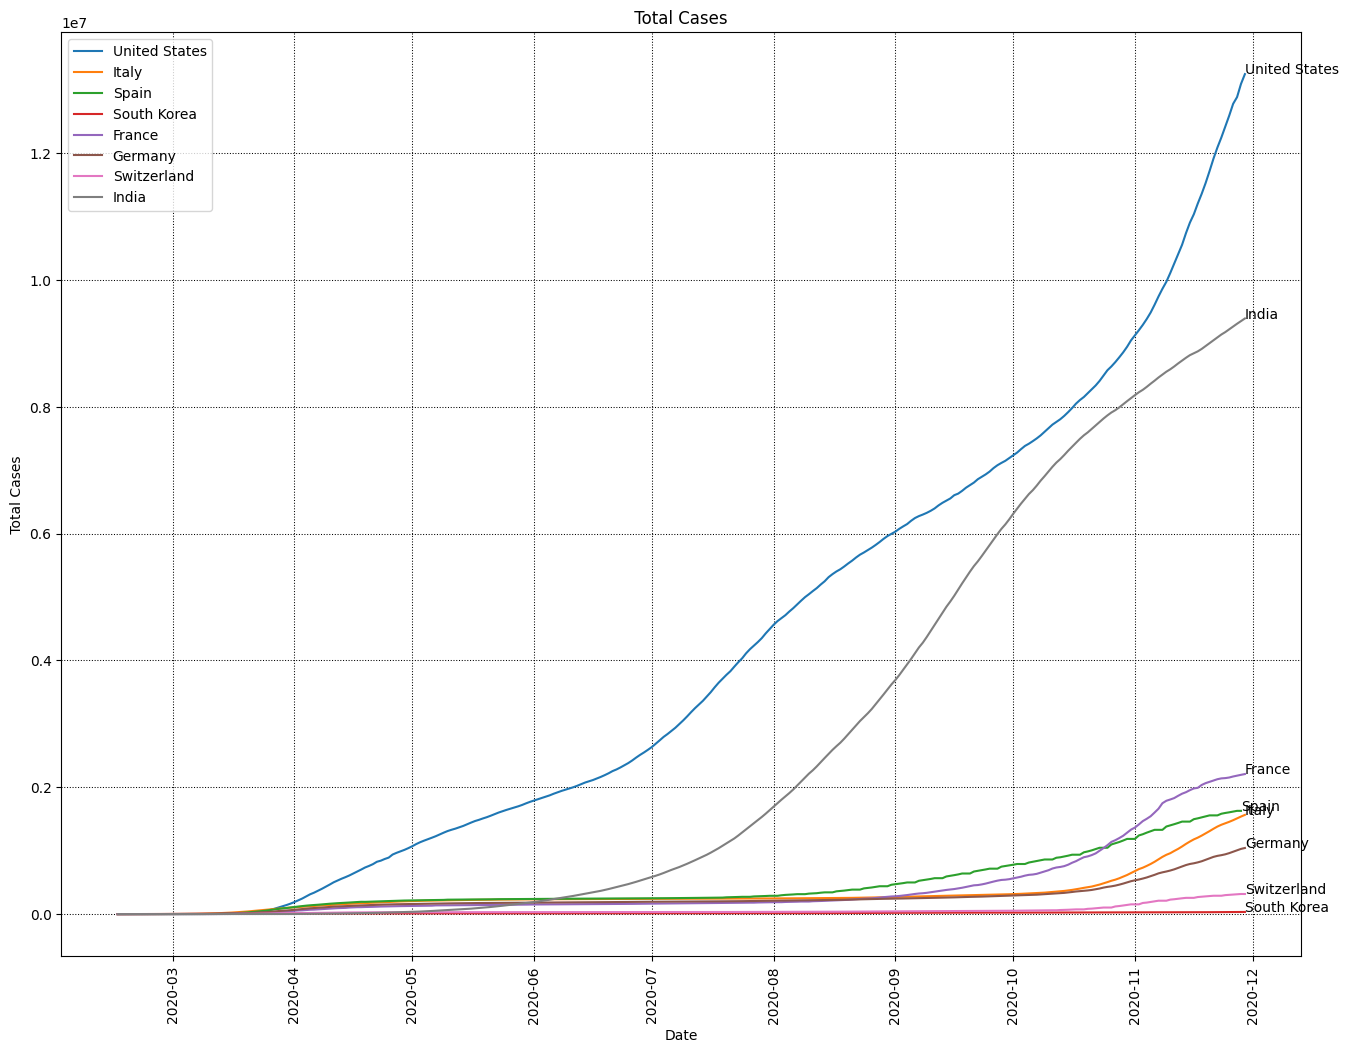

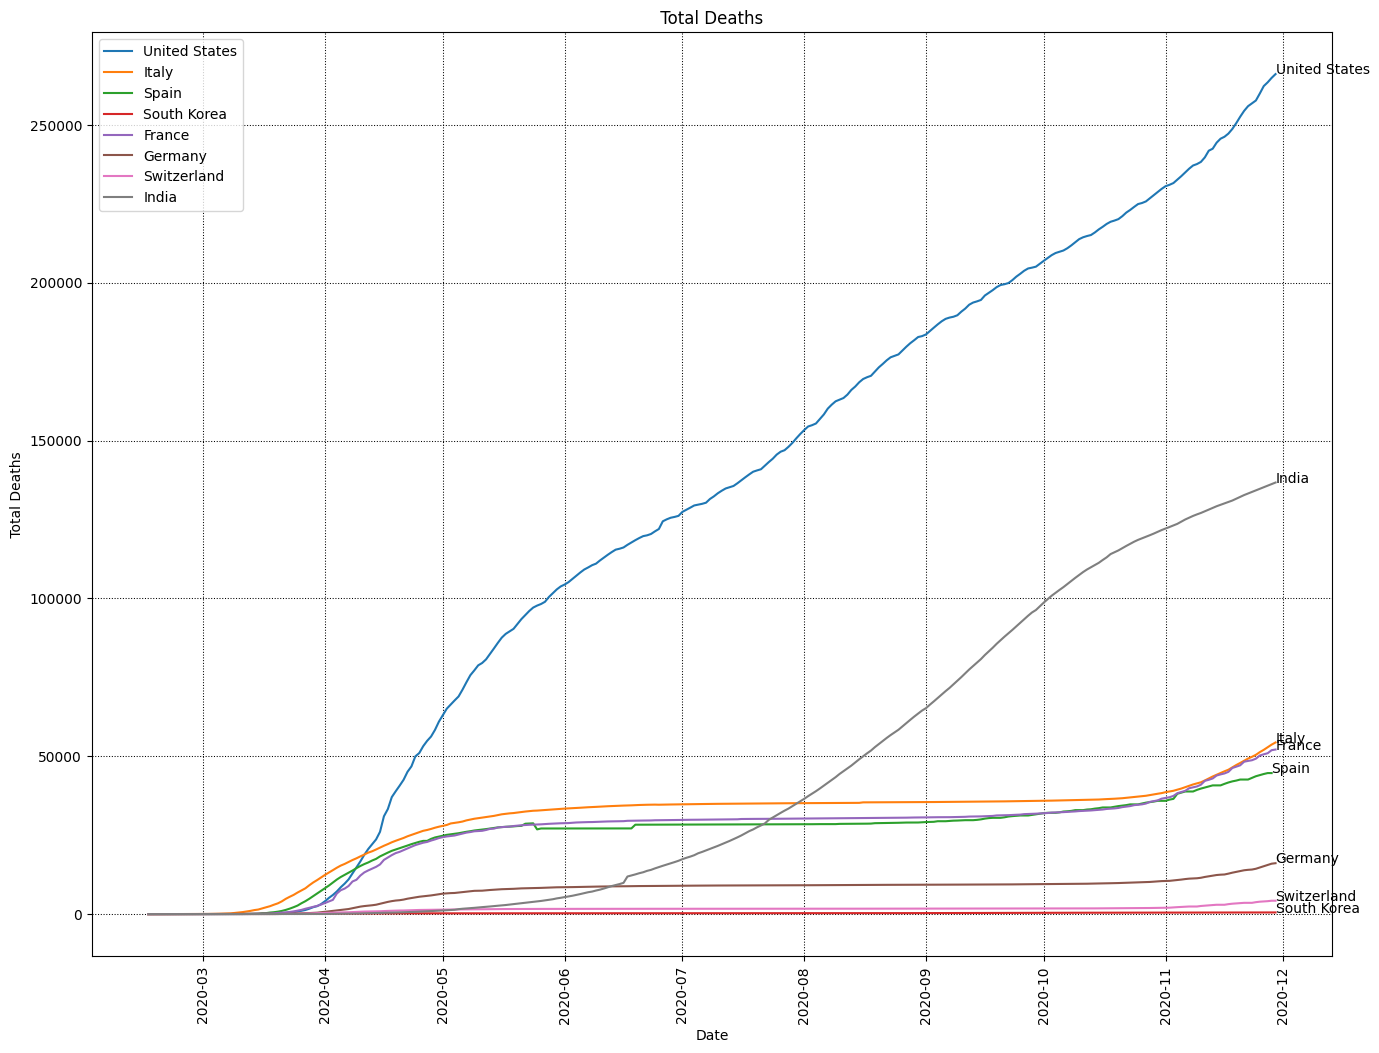

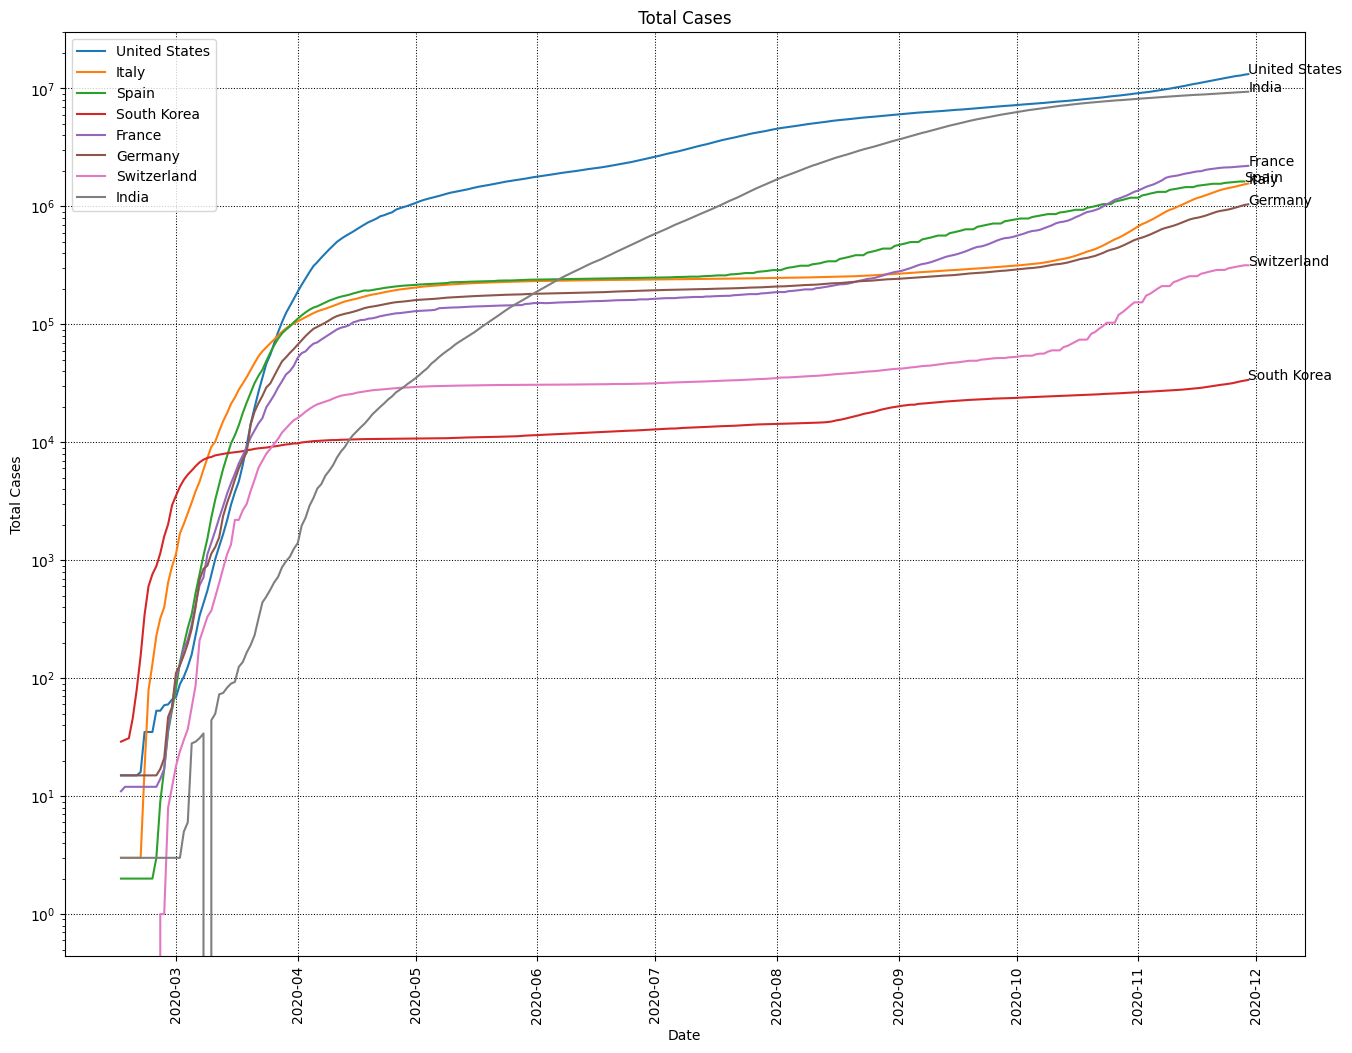

In [45]:

def plot_aggregate_countries(df, countries, case_type='Total Cases', size=3, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 3*size))
    for country in countries:
        df_ = df[(df['Country']==country) & (df['Date'] > '2020-02-15')]
        g = sns.lineplot(x="Date", y=case_type, data=df_,  label=country)
        ax.text(max(df_['Date']), max(df_[case_type]), str(country))
    plt.xlabel('Date')
    plt.ylabel(f' {case_type} ')
    plt.title(f' {case_type} ')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

CVD_country_aggregate = CVD_no_china.groupby(['Country', 'Date']).sum().reset_index()

countries = ["United States", "Italy", "Spain", "South Korea",
                         "France", "Germany", "Switzerland", "India"]
plot_aggregate_countries(CVD_country_aggregate, countries, case_type = 'Total Cases', size=4)

plot_aggregate_countries(CVD_country_aggregate, countries, case_type = 'Total Deaths', size=4)

#log scale
plot_aggregate_countries(CVD_country_aggregate, countries, case_type = 'Total Cases', size=4, is_log=True)

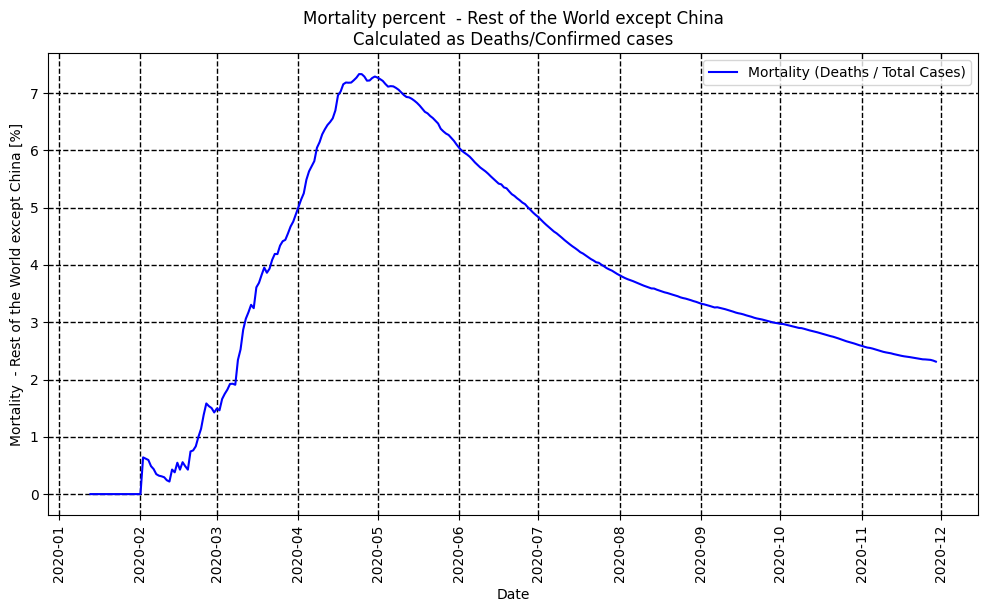

In [46]:
def plot_mortality(df, title='Mainland China', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Mortality (Deaths/Cases)', data=df, color='blue', label='Mortality (Deaths / Total Cases)')
    plt.xlabel('Date')
    plt.ylabel(f'Mortality {title} [%]')
    plt.xticks(rotation=90)
    plt.title(f'Mortality percent {title}\nCalculated as Deaths/Confirmed cases')
    ax.grid(color='black', linestyle='dashed', linewidth=1)
    plt.show()

CVD_no_china_aggregate['Mortality (Deaths/Cases)'] = CVD_no_china_aggregate['Total Deaths'] / CVD_no_china_aggregate['Total Cases'] * 100
plot_mortality(CVD_no_china_aggregate, title = ' - Rest of the World except China', size = 3)